In [1]:
#We import the libraries we need.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#We call both datafiles containing the data for the Speckle Imaging Plot.
file1 = '../../data/toi2431_extra/TIC258804746P-sh20211123r.dat'
file2 = '../../data/toi2431_extra/TIC258804746P-sh20211123b.dat'

In [3]:
#We define a function to read the Photometric data from ExoFOP.
def data_reader(filename):
    #We first define lists to store the data inside the file.
        #measured_data => Data from "annulus range&center vs. measured relative mag. limit"
        #fit_data => Data from "fit of angular separation vs. relative mag. limit"
    measured_data = []
    fit_data = []
    
    #We define a reading mode to store different data in different lists.
    readingmode = None
    
    #We first open the file.
    with open(filename, "r") as f:
        #We go through each line in the file.
        for line in f:
            #We remove the unnecessary spaces in the line we are on.
            line = line.strip()

            #If its not a string/line, we skip it.
            if not line:
                continue

            #Since the "#" means header or section switches in our datafile we check for such lines.
            if line.startswith("#"):
                #We first get the data from "annulus range & center" part i.e. the measured data.
                if "annulus range&center" in line:
                    readingmode = "measured"

                #We then get the data from "fit of angular separation" part i.e. the fit data.
                elif "fit of angular separation" in line:
                    readingmode = "fit"

                #If they are not the headers indicating the data we need, we skip the lines that start with "#"
                continue

            #After picking the "reading mode" we again remove unnecessary spaces in the lines.
            data_line = line.split()

            #If the mode is "measured" then we add the data into our "measured_data" list.
            #Note that there are 4 columns in this part:
                #1-) Lower Annulus
                #2-) Upper Annulus
                #3-) Annulus Center => Will be used, x-axis
                #4-) Measured Relative Magnitude Limit => Will be used, y-axis
            if readingmode == "measured":
                measured_data.append([float(x) for x in data_line])

            #If the mode is "fit" then we add the data into our "fit_data" list.
            elif readingmode == "fit":
                fit_data.append([float(x) for x in data_line])

    return measured_data, fit_data

In [4]:
#We take the measured data and fit data from both datasets.
measured_data_1, fit_data_1 = data_reader(file1)
measured_data_2, fit_data_2 = data_reader(file2)

#We then convert them into NumPy arrays for slicing.
measured_data_1, fit_data_1 = np.array(measured_data_1), np.array(fit_data_1)
measured_data_2, fit_data_2 = np.array(measured_data_2), np.array(fit_data_2)

measured_data_1, fit_data_1

(array([[0.1     , 0.2     , 0.15    , 3.35572 ],
        [0.2     , 0.25    , 0.225   , 3.704807],
        [0.25    , 0.35    , 0.3     , 3.96108 ],
        [0.35    , 0.45    , 0.4     , 4.359561],
        [0.45    , 0.55    , 0.5     , 4.351809],
        [0.55    , 0.65    , 0.6     , 4.42202 ],
        [0.65    , 0.75    , 0.7     , 4.723645],
        [0.75    , 0.85    , 0.8     , 4.937363],
        [0.85    , 0.95    , 0.9     , 4.872348],
        [0.95    , 1.05    , 1.      , 4.829956],
        [1.05    , 1.15    , 1.1     , 4.712009],
        [1.15    , 1.25    , 1.2     , 4.896042]]),
 array([[0.      , 0.      ],
        [0.01    , 0.      ],
        [0.02    , 0.      ],
        [0.03    , 0.      ],
        [0.04    , 0.      ],
        [0.05    , 0.      ],
        [0.059819, 0.      ],
        [0.06    , 0.006961],
        [0.07    , 0.391973],
        [0.08    , 0.776985],
        [0.09    , 1.161997],
        [0.1     , 1.547009],
        [0.11    , 1.932022],
        

In [5]:
#For the measured data we have to take the following parts from our arrays:
    #Third Column => Annulus Center (Index 2)
    #Fourth Column => Magnitude Limit (Index 3)
x_measured_1 = measured_data_1[:, 2]
y_measured_1 = measured_data_1[:, 3]

x_measured_2 = measured_data_2[:, 2]
y_measured_2 = measured_data_2[:, 3]

In [6]:
#For the fit data we have to take the following parts from our arrays:
    #First Column => Angular Separation (Index 0)
    #Second Column => Magnitude Limit (Index 1)
x_fit_1 = fit_data_1[:, 0]
y_fit_1 = fit_data_1[:, 1]

x_fit_2 = fit_data_2[:, 0]
y_fit_2 = fit_data_2[:, 1]

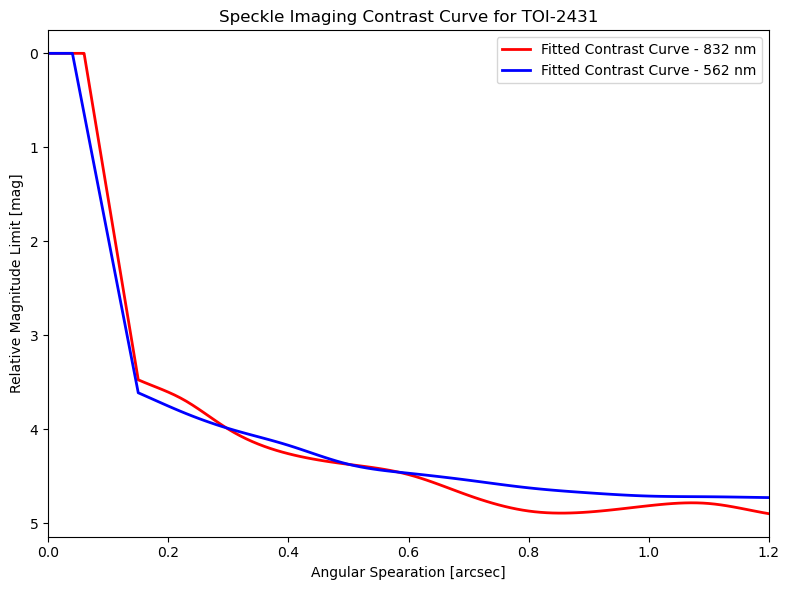

In [7]:
#We then create the Speckle Imaging Plot.
plt.figure(figsize = (8, 6))

#The Fit Values.
plt.plot(x_fit_1, y_fit_1, color = "red", lw = 2, label = "Fitted Contrast Curve - 832 nm")
plt.plot(x_fit_2, y_fit_2, color = "blue", lw = 2, label = "Fitted Contrast Curve - 562 nm")

#The measured values.
#plt.scatter(x_measured_1, y_measured_1, color = "red", s = 50, zorder = 5, label = "Measured Data Points - 832 nm")
#plt.scatter(x_measured_2, y_measured_2, color = "blue", s = 50, zorder = 5, label = "Measured Data Points - 562 nm")

#The labels.
plt.xlabel("Angular Spearation [arcsec]")
plt.ylabel("Relative Magnitude Limit [mag]") #Contrast?
plt.title("Speckle Imaging Contrast Curve for TOI-2431")
plt.legend()
plt.gca().invert_yaxis()
plt.xlim(0.0,1.2)
#plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
#We now call the libraries we need for fits files that contain the image of our source in both wavelengths.
from astropy.io import fits
from astropy.visualization import simple_norm

In [9]:
#We get the fits files.
fits_file_1 = '../../data/toi2431_extra/TIC258804746I-sh20211123b.fits'
fits_file_2 = '../../data/toi2431_extra/TIC258804746I-sh20211123r.fits'

#We load the FITS images.
with fits.open(fits_file_1) as hdul:
    image_data_1 = hdul[0].data
    header_1 = hdul[0].header

with fits.open(fits_file_2) as hdul:
    image_data_2 = hdul[0].data
    header_2 = hdul[0].header

#We normalize the FITS image for better visibility
norm_1 = simple_norm(image_data_1, 'sqrt')
norm_2 = simple_norm(image_data_2, 'sqrt')

                                                                                 [astropy.io.fits.card]


In [10]:
#We extract the CCD plate scale (Pixel Scale) in arcsec/pixel from the header as follows.
pixel_scale_1 = header_1.get("PIXSCL")
pixel_scale_2 = header_2.get("PIXSCL")

print("Pixel Scale for Image 1 ({} Filter): {:.4f} arcsec/pixel".format(header_1.get("FILTER"), pixel_scale_1))
print("Pixel Scale for Image 2 ({} Filter): {:.4f} arcsec/pixel".format(header_2.get("FILTER"), pixel_scale_2))

Pixel Scale for Image 1 (562nm Filter): 0.0183 arcsec/pixel
Pixel Scale for Image 2 (832nm Filter): 0.0183 arcsec/pixel


In [11]:
#We also get the image dimensions to convert the images into arcseconds by using the pixel scales.
ny1, nx1 = image_data_1.shape
ny2, nx2 = image_data_2.shape

print("Dimensions of Image 1: {} x {}".format(nx1, ny1))
print("Dimensions of Image 2: {} x {}".format(nx2, ny2))

Dimensions of Image 1: 256 x 256
Dimensions of Image 2: 256 x 256


In [12]:
#Now we do the conversions so that the center of the image is (0,0) in arcseconds.
im_1_arcsec = [-nx1/2 * pixel_scale_1, #left side
               nx1/2 * pixel_scale_1, #right side
               -ny1/2 * pixel_scale_1, #bottom side
               ny1/2 * pixel_scale_1, #top side
              ]

im_2_arcsec = [-nx2/2 * pixel_scale_2, #left side
               nx2/2 * pixel_scale_2, #right side
               -ny2/2 * pixel_scale_2, #bottom side
               ny2/2 * pixel_scale_2, #top side
              ]

print(f"Image 1 dimensions in arcsec: {im_1_arcsec}")
print(f"Image 2 dimensions in arcsec: {im_2_arcsec}")

Image 1 dimensions in arcsec: [-2.340224, 2.340224, -2.340224, 2.340224]
Image 2 dimensions in arcsec: [-2.343936, 2.343936, -2.343936, 2.343936]


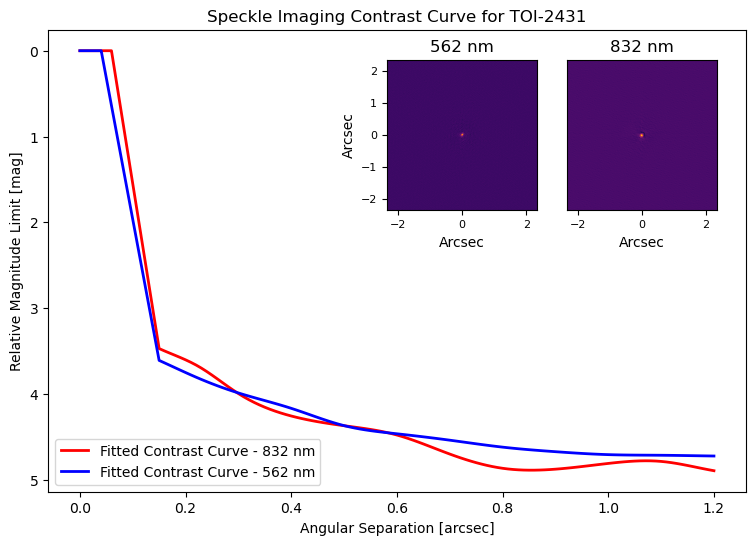

In [13]:
#We then create the Speckle Imaging Plot.
fig, ax = plt.subplots(figsize=(9, 6))

#The Fit Values.
ax.plot(x_fit_1, y_fit_1, color = "red", lw = 2, label = "Fitted Contrast Curve - 832 nm")
ax.plot(x_fit_2, y_fit_2, color = "blue", lw = 2, label = "Fitted Contrast Curve - 562 nm")

#The measured values.
#plt.scatter(x_measured_1, y_measured_1, color = "red", s = 50, zorder = 5, label = "Measured Data Points - 832 nm")
#plt.scatter(x_measured_2, y_measured_2, color = "blue", s = 50, zorder = 5, label = "Measured Data Points - 562 nm")

#The labels.
ax.set_xlabel("Angular Separation [arcsec]")
ax.set_ylabel("Relative Magnitude Limit [mag]") #Contrast?
ax.set_title("Speckle Imaging Contrast Curve for TOI-2431")
ax.legend(loc = "lower left")
ax.invert_yaxis()
#ax.set_xlim(0.0,1.2)
#plt.grid(True)

#We "inset" the images
ax_inset1 = fig.add_axes([0.46, 0.58, 0.25, 0.25])
ax_inset1.imshow(image_data_1, cmap='inferno', norm=norm_1, origin='lower', extent = im_1_arcsec)
# ax_inset1.set_xticks(np.linspace(-2, 2, 5))
# ax_inset1.set_yticks(np.linspace(-2, 2, 5))
ax_inset1.tick_params(axis="both", labelsize=8)
# ax_inset1.set_xticks(np.linspace(0, image_data.shape[1], 5))
# ax_inset1.set_yticks(np.linspace(0, image_data.shape[0], 5))
ax_inset1.set_xlabel("Arcsec")
ax_inset1.set_ylabel("Arcsec")
ax_inset1.set_title("562 nm")

ax_inset2 = fig.add_axes([0.66, 0.58, 0.25, 0.25])
ax_inset2.imshow(image_data_2, cmap='inferno', norm=norm_2, origin='lower', extent = im_2_arcsec)
# ax_inset2.set_xticks(np.arange(-2, 2.1, 1))
# ax_inset2.set_yticks(np.arange(-2, 2.1, 1))
ax_inset2.tick_params(axis="x", labelsize=8)
ax_inset2.set_yticks([])
# ax_inset2.set_xticks(np.linspace(0, image_data.shape[1], 5))
# ax_inset2.set_yticks(np.linspace(0, image_data.shape[0], 5))
ax_inset2.set_xlabel("Arcsec")
ax_inset2.set_title("832 nm")

plt.savefig("toi2431_Speckle_Imaging_Plot.png", dpi = 500)
plt.show()

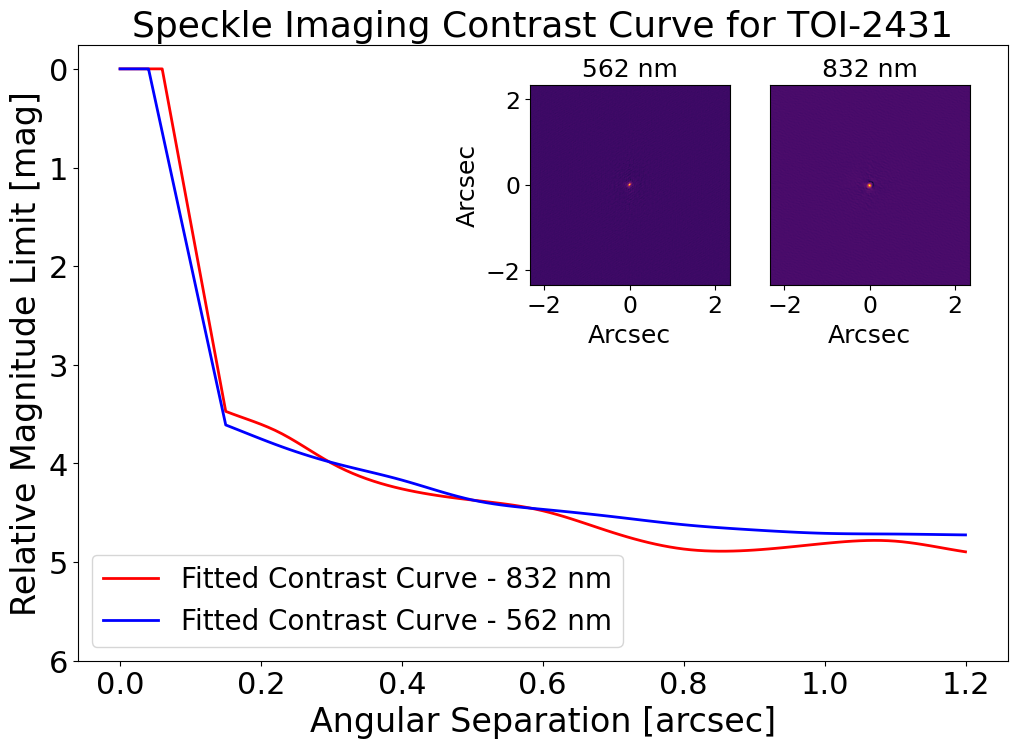

In [14]:
#We then create the Speckle Imaging Plot.
fig, ax = plt.subplots(figsize=(12, 8))

#The Fit Values.
ax.plot(x_fit_1, y_fit_1, color = "red", lw = 2, label = "Fitted Contrast Curve - 832 nm")
ax.plot(x_fit_2, y_fit_2, color = "blue", lw = 2, label = "Fitted Contrast Curve - 562 nm")

#The measured values.
#plt.scatter(x_measured_1, y_measured_1, color = "red", s = 50, zorder = 5, label = "Measured Data Points - 832 nm")
#plt.scatter(x_measured_2, y_measured_2, color = "blue", s = 50, zorder = 5, label = "Measured Data Points - 562 nm")

#The labels.
ax.set_xlabel("Angular Separation [arcsec]", fontsize = 24)
ax.set_ylabel("Relative Magnitude Limit [mag]", fontsize = 24) #Contrast?
ax.set_title("Speckle Imaging Contrast Curve for TOI-2431", fontsize = 26)
ax.tick_params(axis = "both", labelsize = 22)
ax.legend(loc = "lower left", fontsize = 20)
ax.invert_yaxis()
#ax.set_xlim(0.0,1.2)
#plt.grid(True)

#We "inset" the images
ax_inset1 = fig.add_axes([0.46, 0.58, 0.25, 0.25])
ax_inset1.imshow(image_data_1, cmap='inferno', norm=norm_1, origin='lower', extent = im_1_arcsec)
# ax_inset1.set_xticks(np.linspace(-2, 2, 5))
# ax_inset1.set_yticks(np.linspace(-2, 2, 5))
ax_inset1.tick_params(axis="both", labelsize=17)
# ax_inset1.set_xticks(np.linspace(0, image_data.shape[1], 5))
# ax_inset1.set_yticks(np.linspace(0, image_data.shape[0], 5))
ax_inset1.set_xlabel("Arcsec", fontsize = 18)
ax_inset1.set_ylabel("Arcsec", fontsize = 18)
# ax_inset1.set_xticks([0, 100, 200])
ax_inset1.set_title("562 nm", fontsize = 18)

ax_inset2 = fig.add_axes([0.66, 0.58, 0.25, 0.25])
ax_inset2.imshow(image_data_2, cmap='inferno', norm=norm_2, origin='lower', extent = im_2_arcsec)
# ax_inset2.set_xticks(np.arange(-2, 2.1, 1))
# ax_inset2.set_yticks(np.arange(-2, 2.1, 1))
ax_inset2.tick_params(axis = "x", labelsize = 17)
# ax_inset2.set_xticks([0, 100, 200])
ax_inset2.set_yticks([])
# ax_inset2.set_xticks(np.linspace(0, image_data.shape[1], 5))
# ax_inset2.set_yticks(np.linspace(0, image_data.shape[0], 5))
ax_inset2.set_xlabel("Arcsec", fontsize = 18)
ax_inset2.set_title("832 nm", fontsize = 18)

ax.set_ylim(6, ax.get_ylim()[1])

plt.savefig("toi2431_Speckle_Imaging_Plot.png", dpi = 500)
plt.show()